In [1]:
%cd /home/thucth/Biometrics/insightface/recognition/arcface_torch_datagen
import pandas as pd
import matplotlib.pyplot as plt 
import cv2
import random 

/home/thucth/Biometrics/insightface/recognition/arcface_torch_datagen


## Internal Data filter

In [2]:
meta_data = pd.read_csv("/home/thucth/Biometrics/Internal/internal_data_meta_with_clusters_v2.csv")
print(f"Amount: {len(meta_data)}")

Amount: 1323040


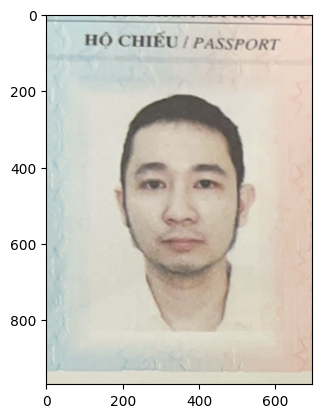

In [ ]:
import cv2 
import matplotlib.pyplot as plt 

img = cv2.imread("/home/thucth/Biometrics/Internal/M0521/M0521__210117000005913/210531000384750_1_422981.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

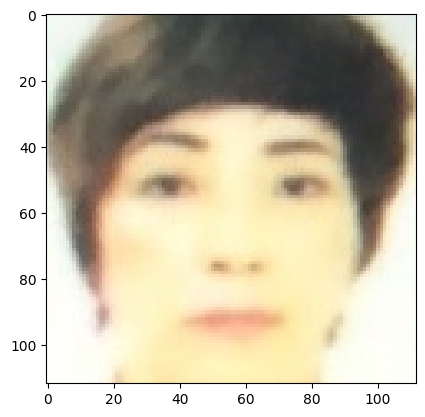

In [ ]:

img = cv2.imread("/home/thucth/Biometrics/Internal/faceid/9_44007846/A0000.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
meta_data['source'].unique()

array(['M0421', 'M0521', 'M0621', 'M0721', 'unite_ZP', 'FaceID'],
      dtype=object)

In [ ]:
import os 
import tqdm

not_found_set = {}
meta_data.insert(0, 'available', 1)

for idx,row in tqdm.tqdm(meta_data.iterrows()):
    active_time = row['active_time']
    if row['active_time'] == "FaceID":
        active_time = "faceid"

    if not os.path.exists(os.path.join("/home/thucth/Biometrics/Internal",active_time, row['folder_id'],row['filename'])):
        meta_data['available'][idx] = 0
        if row['active_time'] not in not_found_set: not_found_set[row['active_time']]=[]
        not_found_set[row['active_time']].append(active_time+"/"+row['folder_id']+"/"+row['filename'])

41507it [00:03, 17350.52it/s]/tmp/ipykernel_20861/848507023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['available'][idx] = 0
1323040it [02:23, 9234.04it/s] 


In [ ]:
print(f"Data active times: {meta_data['active_time'].unique()}")

Data active times: ['M0421' 'M0521' 'M0621' 'M0721' 'M0121' 'M0221' 'M062020' 'M092020'
 'M082020' 'M052020' 'M072020' 'Unknown']


In [ ]:
for k in not_found_set.keys():
    print(f"Not found in {k}:  {len(not_found_set[k])}")

Not found in M0421:  3
Not found in M0521:  16
Not found in M0721:  1
Not found in M0121:  1
Not found in Unknown:  247347


In [68]:
meta_data = pd.read_csv("/home/thucth/Biometrics/Internal/internal_data_available_2identities_1M.csv")
meta_data_available = meta_data[meta_data['available']==1]
len(meta_data_available)

1075672

In [69]:
print(f"Num of Identities: {len(meta_data_available['cluster_id'].unique())}")

Num of Identities: 340569


In [70]:
import numpy as np

cluster_count = meta_data_available.groupby(['cluster_id'])['cluster_id'].count()
cluster_count_arr = np.array(cluster_count)
identities_chosen = cluster_count[cluster_count_arr>=2].index

print(f'Num of Identities have >=2 images: {len(identities_chosen)}')

Num of Identities have >=2 images: 324171


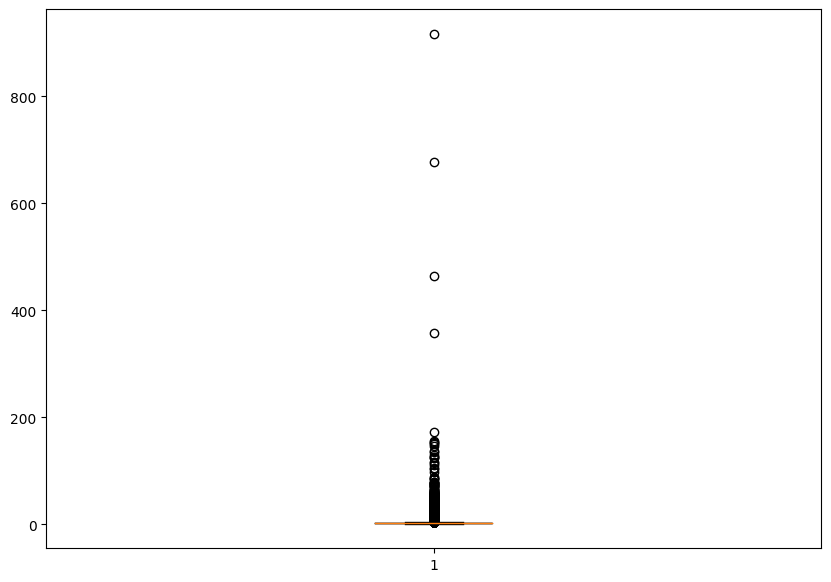

In [71]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize =(10, 7))
plt.boxplot(cluster_count.values )
plt.show()

In [72]:
data_chosen = meta_data_available[meta_data_available['cluster_id'].isin(identities_chosen)]
print(f'Num of data training: {len(data_chosen)}')
data_chosen.head()

Num of data training: 1059274


Unnamed: 0  available active_time               folder_id  \
0           0          1       M0421  M0421__210401002003269   
1           1          1       M0421  M0421__210401002003269   
2           2          1       M0421  M0421__210401002003269   
4           4          1       M0421  M0421__201224001019626   
5           5          1       M0421  M0421__201224001019626   

                       filename image_type  orientation  is_aligned  \
0  210420000241116_1_265427.jpg         id            0       False   
1  210419000241095_1_265407.jpg         id            0       False   
2  210420000241116_3_265436.jpg     selfie            0       False   
4   210407000071530_3_78371.jpg     selfie            0       False   
5   210407000071530_1_78359.jpg         id            0       False   

   cluster_id  x1  ...  kps_y1  kps_x2  kps_y2  kps_x3  kps_y3  kps_x4  \
0       12011  63  ...   124.0   130.0   123.0   108.0   147.0    93.0   
1       12011  61  ...   125.0   122.0   124.0   103.0   147.0    86.0   
2       12011  93  ...   327.0   220.0   321.0   182.0   381.0   151.0   
4       12013  63  ...   291.0   225.0   294.0   176.0   344.0   130.0   
5       12013  54  ...   120.0   108.0   118.0    92.0   140.0    81.0   

   kps_y4  kps_x5  kps_y5  source  
0   169.0   126.0   167.0   M0421  
1   169.0   119.0   168.0   M0421  
2   419.0   220.0   413.0   M0421  
4   402.0   216.0   402.0   M0421  
5   161.0   107.0   159.0   M0421  

[5 rows x 24 columns]

In [ ]:
data_chosen[data_chosen['cluster_id']==2000].head(10)

Empty DataFrame
Columns: [Unnamed: 0, available, active_time, folder_id, filename, image_type, orientation, is_aligned, cluster_id, x1, y1, x2, y2, kps_x1, kps_y1, kps_x2, kps_y2, kps_x3, kps_y3, kps_x4, kps_y4, kps_x5, kps_y5, source]
Index: []

[0 rows x 24 columns]

In [ ]:
#random sort for fairly pick images
data_chosen = data_chosen.groupby('cluster_id').apply(lambda x: x.iloc[np.random.permutation(len(x))]).reset_index(drop=True)


In [ ]:
data_chosen.head(10)

Unnamed: 0  available active_time               folder_id  \
0      405956          1       M0521  M0521__210117000005913   
1      119309          1       M0421  M0421__210117000005913   
2      405953          1       M0521  M0521__210117000005913   
3      119310          1       M0421  M0421__210117000005913   
4      510348          1       M0521  M0521__210418000505952   
5      405955          1       M0521  M0521__210117000005913   
6      510347          1       M0521  M0521__210418000505952   
7      405957          1       M0521  M0521__210117000005913   
8      405954          1       M0521  M0521__210117000005913   
9      119308          1       M0421  M0421__210117000005913   

                       filename image_type  orientation  is_aligned  \
0  210531000384750_1_422981.jpg         id            0       False   
1    210401000006262_1_7622.jpg         id            0       False   
2  210531000384750_3_422985.jpg     selfie            0       False   
3    210401000006347_1_7726.jpg         id            0       False   
4  210531000384898_1_423019.jpg         id            0       False   
5  210531000384750_1_422979.jpg         id            0       False   
6  210531000384898_3_423022.jpg     selfie            0       False   
7  210531000384750_1_422977.jpg         id            0       False   
8  210531000384750_3_422986.jpg     selfie            0       False   
9    210401000006262_3_7630.jpg     selfie            0       False   

   cluster_id   x1  ...  kps_y1  kps_x2  kps_y2  kps_x3  kps_y3  kps_x4  \
0           1  203  ...   446.0   417.0   444.0   344.0   528.0   301.0   
1           1  138  ...   292.0   284.0   296.0   241.0   343.0   210.0   
2           1   45  ...   285.0   251.0   286.0   186.0   370.0   136.0   
3           1  142  ...   318.0   287.0   316.0   239.0   363.0   206.0   
4           1  144  ...   302.0   286.0   297.0   241.0   359.0   209.0   
5           1  168  ...   382.0   335.0   388.0   270.0   453.0   229.0   
6           1   88  ...   306.0   311.0   300.0   241.0   410.0   191.0   
7           1  168  ...   382.0   335.0   388.0   270.0   453.0   229.0   
8           1   62  ...   311.0   301.0   341.0   221.0   429.0   146.0   
9           1   51  ...   312.0   310.0   311.0   236.0   405.0   176.0   

   kps_y4  kps_x5  kps_y5  source  
0   593.0   406.0   591.0   M0521  
1   397.0   274.0   398.0   M0421  
2   438.0   226.0   440.0   M0521  
3   421.0   280.0   419.0   M0421  
4   408.0   283.0   400.0   M0521  
5   507.0   326.0   509.0   M0521  
6   480.0   295.0   478.0   M0521  
7   507.0   326.0   509.0   M0521  
8   479.0   245.0   496.0   M0521  
9   496.0   285.0   494.0   M0421  

[10 rows x 24 columns]

In [ ]:
#random pick from 5 to at most 12 images for each identities to avoid bias on any class
data_chosen = data_chosen.groupby("cluster_id").head(12)

print(f'Number of images: {len(data_chosen)}')
print('Average number of images per class: %f'%(len(data_chosen)/len(data_chosen['cluster_id'].unique())))


Number of images: 302396
Average number of images per class: 6.931713


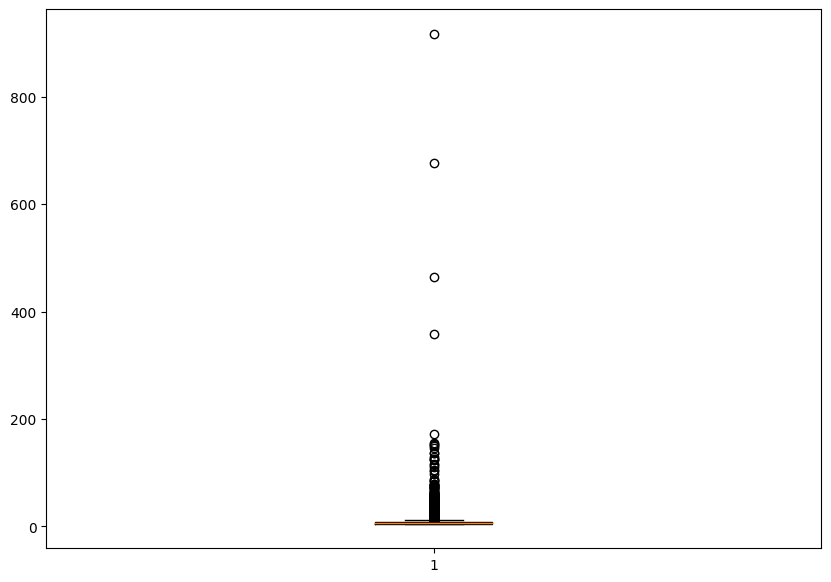

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize =(10, 7))
cluster_count = data_chosen.groupby(['cluster_id'])['cluster_id'].count()

plt.boxplot(cluster_count.values )
plt.show()

In [ ]:
print(f'Number of images: {len(data_chosen)}')
print('Average number of images per class: %f'%(len(data_chosen)/len(data_chosen['cluster_id'].unique())))

Number of images: 107975
Average number of images per class: 15.522570


In [ ]:
data_chosen = data_chosen.drop('Unnamed: 0', axis=1).reset_index(drop=True)

In [ ]:
data_chosen.head()

available active_time               folder_id  \
0          1       M0421  M0421__210102001501814   
1          1       M0421  M0421__210102001501814   
2          1       M0421  M0421__210102001501814   
3          1       M0421  M0421__210102001501814   
4          1       M0421  M0421__210102001501814   

                       filename image_type  orientation  is_aligned  \
0  210410000106386_1_116168.jpg         id            0       False   
1  210409000101426_3_110913.jpg     selfie            0       False   
2  210409000101426_3_110910.jpg     selfie            0       False   
3  210409000101426_3_110911.jpg     selfie            0       False   
4  210409000101426_1_110903.jpg         id            0       False   

   cluster_id   x1   y1  ...  kps_y1  kps_x2  kps_y2  kps_x3  kps_y3  kps_x4  \
0        6408  115  152  ...   241.0   235.0   242.0   198.0   283.0   170.0   
1        6408   74   72  ...   187.0   245.0   194.0   194.0   258.0   154.0   
2        6408   47   89  ...   205.0   213.0   214.0   165.0   274.0   121.0   
3        6408   47   89  ...   205.0   213.0   214.0   165.0   274.0   121.0   
4        6408  110  141  ...   220.0   231.0   221.0   196.0   264.0   164.0   

   kps_y4  kps_x5  kps_y5  source  
0   319.0   222.0   320.0   M0421  
1   305.0   233.0   306.0   M0421  
2   318.0   197.0   322.0   M0421  
3   318.0   197.0   322.0   M0421  
4   295.0   216.0   298.0   M0421  

[5 rows x 23 columns]

In [ ]:
data_chosen.to_csv("/home/thucth/Biometrics/Internal/internal_data_available_10identities_100k.csv", index=False)

## Webface filter

In [ ]:
meta_data_available = pd.read_csv("/home/thucth/Biometrics/Webface/webface_42M.csv", low_memory=False)
len(meta_data_available)

42474558

In [ ]:
print(f"Num of Identities: {len(meta_data_available['cluster_id'].unique())}")

Num of Identities: 2059906


In [ ]:
import numpy as np

cluster_count = meta_data_available.groupby(['cluster_id'])['cluster_id'].count()
cluster_count_arr = np.array(cluster_count)
identities_chosen = cluster_count[cluster_count_arr>=50].index

print(f'Num of Identities have >=50 images: {len(identities_chosen)}')

Num of Identities have >=50 images: 189673


In [ ]:
data_chosen = meta_data_available[meta_data_available['cluster_id'].isin(identities_chosen)]
print(f'Num of data training: {len(data_chosen)}')
data_chosen.head()

Num of data training: 17148634


cluster_id                                               path
350  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
351  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
352  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
353  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
354  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...

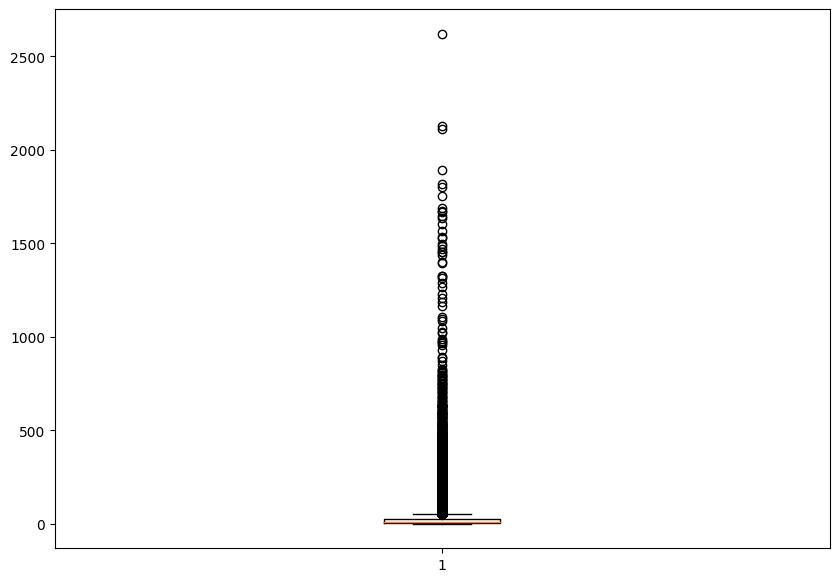

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize =(10, 7))
plt.boxplot(cluster_count.values )
plt.show()

In [ ]:
data_chosen.to_csv("/home/thucth/Biometrics/Webface/webface_50identities_17M.csv", index=False)

## Image folder to csv

In [2]:
import os
from glob import  glob 
from tqdm import tqdm
import csv 

source = "/home/thucth/Biometrics/Webface/Webface_raw/WebFace260M/"
# source = "/home/thucth/Biometrics/Internal/InternalAligned"

webface_data_list = []
data_folder = os.listdir(source)
data_folder.sort()

for cluster_id in tqdm(data_folder):
    image_paths = glob(os.path.join(source, cluster_id, '*'))
    cluster_and_imgs = list(zip([cluster_id]*len(image_paths), image_paths))
    webface_data_list +=cluster_and_imgs


100%|██████████| 2059906/2059906 [05:33<00:00, 6182.70it/s]


In [3]:
len(data_folder)

2059906

In [4]:
len(webface_data_list)

42474558

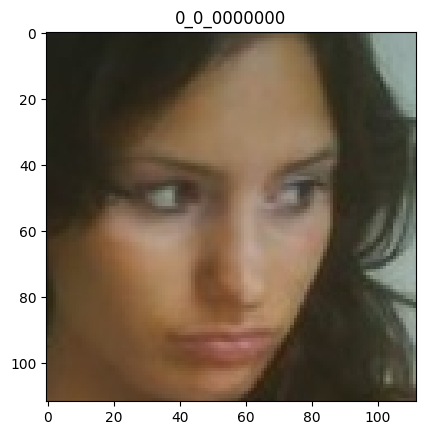

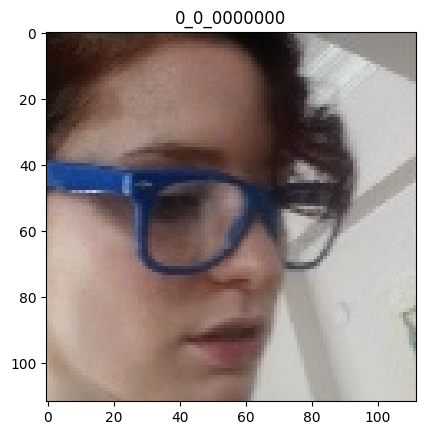

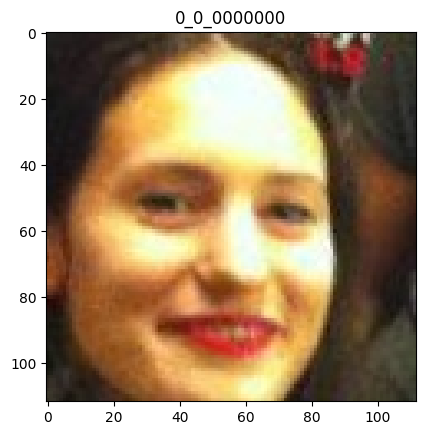

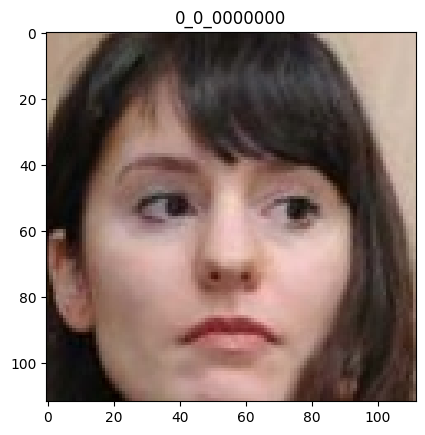

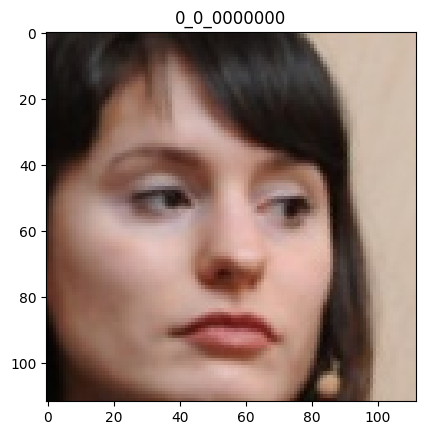

In [5]:
for img_path in webface_data_list[:5]:
# for idx, img_path in data_chosen.iloc[:4].iterrows():
    img = cv2.imread(img_path[1])
    plt.imshow(img[:,:,::-1])
    plt.title(img_path[0])
    plt.show()

In [8]:
import csv 
with open("/home/thucth/Biometrics/Webface/webface_42M.csv","w+") as f:
with open("/home/thucth/Biometrics/Internal/internal_aligned_363kIden_1306kImage.csv","w+") as f:
    writer = csv.writer(f)
    writer.writerow(["cluster_id","path"])
    for row in tqdm(webface_data_list):
        writer.writerow(row)


100%|██████████| 1306272/1306272 [00:03<00:00, 352652.70it/s]


## Write record

In [9]:
import pandas as pd

internal_data = pd.read_csv("/home/thucth/Biometrics/Internal/internal_aligned_363kIden_1306kImage.csv")
internal_data.head()

cluster_id                                               path
0           0  /home/thucth/Biometrics/Internal/InternalAlign...
1           0  /home/thucth/Biometrics/Internal/InternalAlign...
2           0  /home/thucth/Biometrics/Internal/InternalAlign...
3           1  /home/thucth/Biometrics/Internal/InternalAlign...
4           1  /home/thucth/Biometrics/Internal/InternalAlign...

In [10]:
#ordinal encode cluster id from 0 -> num_class-1
ordinal_classes, amount_classes = pd.factorize(internal_data['cluster_id'].values)

internal_data['cluster_id'] = ordinal_classes
print(f'Number of classes: {len(amount_classes)}')
print(f'Average number of images per class: {len(ordinal_classes)/len(amount_classes)}')
internal_data.sort_values(by=['cluster_id'], inplace=True)

internal_data.head()

Number of classes: 363585
Average number of images per class: 3.5927554767110856


cluster_id                                               path
0           0  /home/thucth/Biometrics/Internal/InternalAlign...
1           0  /home/thucth/Biometrics/Internal/InternalAlign...
2           0  /home/thucth/Biometrics/Internal/InternalAlign...
3           1  /home/thucth/Biometrics/Internal/InternalAlign...
4           1  /home/thucth/Biometrics/Internal/InternalAlign...

In [11]:
cluster_count = internal_data.groupby(["cluster_id"])["cluster_id"].count()
cluster_count = pd.DataFrame(cluster_count)
cluster_count['count'] = cluster_count['cluster_id']
cluster_count = cluster_count.drop(labels="cluster_id",axis=1)
cluster_count.head(3)

count
cluster_id       
0               3
1               2
2               2

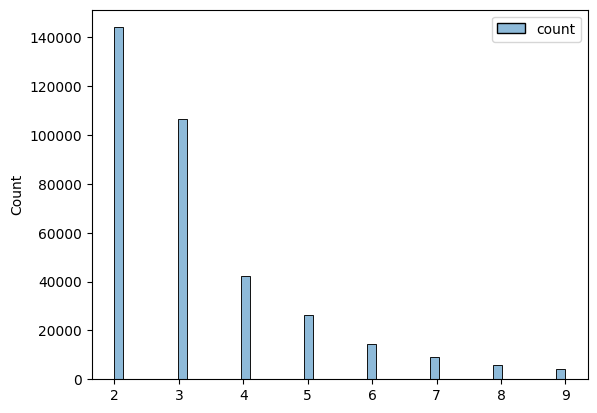

In [12]:
cluster_count_ = cluster_count[cluster_count['count']<10]
import seaborn as sns
sns.histplot(cluster_count_, bins = 50)
plt.show()

In [13]:
import numpy as np
import cv2 
from skimage import transform
import matplotlib.pyplot as plt

ALIGNED_FACE_TEMPLATE_112112 = np.array([[30.2946+8, 51.6963],
                                        [65.5318+8, 51.5014],
                                        [48.0252+8, 71.7366],
                                        [33.5493+8, 92.3655],
                                        [62.7299+8, 92.2041]], dtype=np.float32)
ALIGNED_FACE_IMG_DIM_112112 = (112, 112)

def align_face(img,kps):
    transformer = transform.SimilarityTransform()
    transformer.estimate(np.array(kps), ALIGNED_FACE_TEMPLATE_112112)
    M = transformer.params[0:2, :]
    # M, _ = cv2.estimateAffinePartial2D(kps, ALIGNED_FACE_TEMPLATE_112112)    
    # # print(M)    
    
    face = cv2.warpAffine(img, M, ALIGNED_FACE_IMG_DIM_112112, borderValue=0.0)
    return face

In [ ]:
# %matplotlib inline
# from rec_builder import RecBuilder
# from tqdm import tqdm 
# import   glob
# # %%
# builder = RecBuilder("/home/thucth/Biometrics/CombineData/MxRecord")
# data_path = "/home/thucth/Biometrics/Internal"

# current_label = 0.
# current_clusterid = 0.
# current_imgs = []
# print("total: ", len(internal_data))
# # for idx in range(len(internal_data)):
# # for idx in tqdm(range(len(internal_data))):
# for idx in tqdm(range(500)):
#     # if idx%10000 == 0:
#     if idx%100 == 0:
#         print(idx)
#     try:
#         row = internal_data.iloc[idx]
#         img_path = os.path.join(data_path, row['active_time'], row['folder_id'],row['filename'])
#         clusterid = float(row['cluster_id'])
        
#         try:
#             img = cv2.imread(img_path)
#         except FileNotFoundError:
#             print(f"File {img_path} not found.")
#             continue
#         except IOError:
#             print(f"An error occurred while reading the file {img_path}.")
#             continue
#         except Exception as e:
#             print("An unknown error occurred:", e)
#             continue

#         if img is None: continue
        

#         if current_clusterid != clusterid:
#             if len(current_imgs)>=2:
#                 #write to record
#                 builder.add(current_label, current_imgs)
#                 current_clusterid = clusterid
#                 current_imgs = []
#                 current_label+=1
#             else:
#                 current_clusterid = clusterid
#                 current_imgs = []
#                 continue
        
#         if row['is_aligned']:
#             face = img 
#         else:
#             kps = np.array(row[["kps_x1","kps_y1","kps_x2","kps_y2","kps_x3","kps_y3","kps_x4","kps_y4","kps_x5","kps_y5"]].tolist())
#             kps = kps.reshape(-1,2)

#             face = align_face(img, kps)

#         _, buffer = cv2.imencode('.jpg', face)
#         str_image = buffer.tobytes()
#         # with open(img_path, 'rb') as fp:
#         #     str_image = fp.read()
#         if len(str_image) <= 0:
#             continue
#         current_imgs.append(str_image)
#     except Exception as e:
#         print("===========================")
#         print(e)
#         print(img_path)
#         print(idx)
#         # import pdb; pdb.set_trace()
#         print("===========================")
#         pass

    
# # builder.close()


total:  107975


  2%|▏         | 9/500 [00:00<00:05, 87.07it/s]

0


 26%|██▌       | 128/500 [00:00<00:01, 201.32it/s]

100


 47%|████▋     | 233/500 [00:01<00:01, 245.61it/s]

200


 69%|██████▉   | 344/500 [00:01<00:00, 256.65it/s]

300


 86%|████████▌ | 429/500 [00:01<00:00, 269.28it/s]

400


100%|██████████| 500/500 [00:02<00:00, 222.56it/s]


In [15]:
%matplotlib inline
from rec_builder import RecBuilder
from tqdm import tqdm 
import   glob
# %%
builder = RecBuilder("/home/thucth/Biometrics/Internal/MxRecord")
data_path = "/home/thucth/Biometrics/Internal/InternalAligned"

current_label = 0.
current_clusterid = 0.
current_imgs = []
print("total: ", len(internal_data))
# for idx in range(len(internal_data)):
for idx in tqdm(range(len(internal_data))):
# for idx in tqdm(range(500)):
    # if idx%10000 == 0:
    # if idx%100 == 0:
        # print(idx)
    try:
        row = internal_data.iloc[idx]
        img_path = row['path']
        clusterid = float(row['cluster_id'])
        
        try:
            img = cv2.imread(img_path)
        except FileNotFoundError:
            print(f"File {img_path} not found.")
            continue
        except IOError:
            print(f"An error occurred while reading the file {img_path}.")
            continue
        except Exception as e:
            print("An unknown error occurred:", e)
            continue

        if img is None: continue
        

        if current_clusterid != clusterid:
            if len(current_imgs)>=2:
                #write to record
                builder.add(current_label, current_imgs)
                current_clusterid = clusterid
                current_imgs = []
                current_label+=1
            else:
                print("current_img less images than 2")
                print(cluster_id)
                current_clusterid = clusterid
                current_imgs = []
                continue
        
        face = img 

        _, buffer = cv2.imencode('.jpg', face)
        str_image = buffer.tobytes()
        if len(str_image) <= 0:
            continue
        current_imgs.append(str_image)
    except Exception as e:
        print("===========================")
        print(e)
        print(img_path)
        print(idx)
        # import pdb; pdb.set_trace()
        print("===========================")
        pass
    
if len(current_imgs)>=2:
    #write to record
    builder.add(current_label, current_imgs)
    current_clusterid = clusterid

builder.close()

total:  1306272


100%|██████████| 1306272/1306272 [17:52<00:00, 1218.52it/s]


id0: (1306273, 1669858)
label stat: [0.0, 363584.0]


## Public Webface42M

In [ ]:
import pandas as pd

webface_data = pd.read_csv("/home/thucth/Biometrics/Webface/webface_50identities_17M.csv")
webface_data.head()

cluster_id                                               path
0  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
1  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
2  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
3  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
4  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...

In [ ]:
webface_data.sort_values(by=['cluster_id'], inplace=True)
webface_data.head()

cluster_id                                               path
0   0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
87  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
86  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
85  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...
84  0_0_0000028  /home/thucth/Biometrics/Webface/Webface_raw/We...

In [ ]:
%matplotlib inline
from rec_builder import RecBuilder
from tqdm import tqdm 
import   glob
# %%
# builder = RecBuilder("/home/thucth/Biometrics/Webface/MxRecord")
data_path = "/home/thucth/Biometrics/Webface/Webface_raw/WebFace260M/"

# current_label = 0.
# current_clusterid = 0.
# current_imgs = []
print("total: ", len(webface_data))
# for idx in range(len(webface_data)):
# for idx in tqdm(range(len(webface_data))):
for idx in tqdm(range(500)):
    # if idx%10000 == 0:
    if idx%100 == 0:
        print(idx)
    try:
        row = webface_data.iloc[idx]
        img_path = row['path']
        clusterid = float(row['cluster_id'])
        
        try:
            img = cv2.imread(img_path)
        except FileNotFoundError:
            print(f"File {img_path} not found.")
            continue
        except IOError:
            print(f"An error occurred while reading the file {img_path}.")
            continue
        except Exception as e:
            print("An unknown error occurred:", e)
            continue

        if img is None: continue
        

        if current_clusterid != clusterid:
            if len(current_imgs)>=2:
                #write to record
                builder.add(current_label, current_imgs)
                current_clusterid = clusterid
                current_imgs = []
                current_label+=1
            else:
                current_clusterid = clusterid
                current_imgs = []
                continue
        
        _, buffer = cv2.imencode('.jpg', img)
        str_image = buffer.tobytes()
        # with open(img_path, 'rb') as fp:
        #     str_image = fp.read()
        if len(str_image) <= 0:
            continue
        current_imgs.append(str_image)
    except Exception as e:
        print("===========================")
        print(e)
        print(img_path)
        print(idx)
        # import pdb; pdb.set_trace()
        print("===========================")
        pass
builder.close()


## Read record

In [ ]:
import mxnet as mx

path_imgidx = "/home/thucth/Biometrics/CombineData/MxRecord/train.idx"
path_imgrec = "/home/thucth/Biometrics/CombineData/MxRecord/train.rec"

imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r') #5721.6 MiB
s = imgrec.read_idx(0)
header, _ = mx.recordio.unpack(s)


In [ ]:
import numpy as np
if header.flag > 0:
    header0 = (int(header.label[0]), int(header.label[1]))
    imgidx = np.array(range(1, int(header.label[0]))) #328.3 MiB 
else:
    imgidx = np.array(list(imgrec.keys))

In [ ]:
header.flag 

2

In [ ]:
header0

(980, 1012)

In [ ]:
imgidx

/tmp/ipykernel_28308/57173814.py:13: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


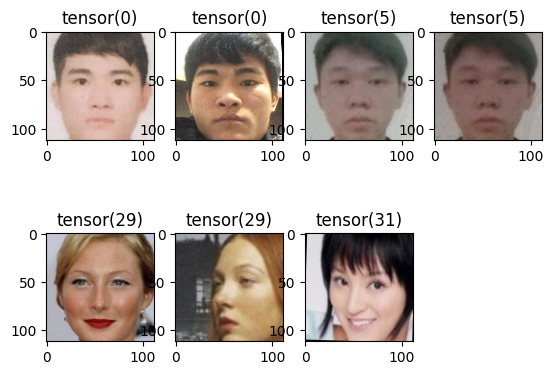

In [ ]:
import numbers
import torch 
import matplotlib.pyplot as plt

for i, img_idx in enumerate([1,2,100,101, 700,701,800]):

    s = imgrec.read_idx(img_idx)
    header, img = mx.recordio.unpack(s)
    label = header.label
    if not isinstance(label, numbers.Number):
        label = label[0]
    sample = mx.image.imdecode(img).asnumpy()
    label = torch.tensor(label, dtype=torch.long)
    plt.subplot(2,4,i+1)
    plt.imshow(sample)
    plt.title(label=label)
plt.show()
    

## Align face offline for internal >=5 identities

In [ ]:
import pandas as pd

internal_data = pd.read_csv("/home/thucth/Biometrics/Internal/internal_data_available_5identities_331k.csv")
internal_data.head()

available active_time               folder_id  \
0          1       M0521  M0521__210117000005913   
1          1       M0421  M0421__210117000005913   
2          1       M0521  M0521__210117000005913   
3          1       M0421  M0421__210117000005913   
4          1       M0521  M0521__210418000505952   

                       filename image_type  orientation  is_aligned  \
0  210531000384750_1_422981.jpg         id            0       False   
1    210401000006262_1_7622.jpg         id            0       False   
2  210531000384750_3_422985.jpg     selfie            0       False   
3    210401000006347_1_7726.jpg         id            0       False   
4  210531000384898_1_423019.jpg         id            0       False   

   cluster_id   x1   y1  ...  kps_y1  kps_x2  kps_y2  kps_x3  kps_y3  kps_x4  \
0           1  203  283  ...   446.0   417.0   444.0   344.0   528.0   301.0   
1           1  138  190  ...   292.0   284.0   296.0   241.0   343.0   210.0   
2           1   45  120  ...   285.0   251.0   286.0   186.0   370.0   136.0   
3           1  142  200  ...   318.0   287.0   316.0   239.0   363.0   206.0   
4           1  144  194  ...   302.0   286.0   297.0   241.0   359.0   209.0   

   kps_y4  kps_x5  kps_y5  source  
0   593.0   406.0   591.0   M0521  
1   397.0   274.0   398.0   M0421  
2   438.0   226.0   440.0   M0521  
3   421.0   280.0   419.0   M0421  
4   408.0   283.0   400.0   M0521  

[5 rows x 23 columns]

In [ ]:
%matplotlib inline
from rec_builder import RecBuilder
from tqdm import tqdm 
import   glob
# %%
data_path = "/home/thucth/Biometrics/Internal"
path_internal_aligned = "/home/thucth/Biometrics/Internal/Aligned_5identities_331k"
print("total: ", len(internal_data))
# for idx in range(len(internal_data)):
for idx in tqdm(range(len(internal_data))):
# for idx in tqdm(range(50)):
    # if idx%10000 == 0:
    # if idx%100 == 0:
    #     print(idx)
    try:
        row = internal_data.iloc[idx]
        img_path = os.path.join(data_path, row['active_time'], row['folder_id'],row['filename'])
        
        try:
            img = cv2.imread(img_path)
        except FileNotFoundError:
            print(f"File {img_path} not found.")
            continue
        except IOError:
            print(f"An error occurred while reading the file {img_path}.")
            continue
        except Exception as e:
            print("An unknown error occurred:", e)
            continue

        if img is None: continue
        
        if row['is_aligned']:
            face = img 
        else:
            kps = np.array(row[["kps_x1","kps_y1","kps_x2","kps_y2","kps_x3","kps_y3","kps_x4","kps_y4","kps_x5","kps_y5"]].tolist())
            kps = kps.reshape(-1,2)

            face = align_face(img, kps)

        os.makedirs(os.path.join(path_internal_aligned, row['cluster_id']), exist_ok=True)
        cv2.imwrite(os.path.join(path_internal_aligned, row['cluster_id'],row['filename']),face)
    except Exception as e:
        print("===========================")
        print(e)
        print(img_path)
        print(idx)
        # import pdb; pdb.set_trace()
        print("===========================")
        pass

    
# builder.close()


total:  331190


100%|██████████| 331190/331190 [29:52<00:00, 184.72it/s]


In [ ]:
%matplotlib inline
from tqdm import tqdm 
import pandas as pd
import shutil
import cv2 

internal_data = pd.read_csv("/home/thucth/Biometrics/Internal/internal_data_available_5identities_331k.csv")
internal_data.head(2)

source = "/home/thucth/Biometrics/Internal/Aligned_5identities_331k"
target = "/home/thucth/Biometrics/Internal/Identities"

print("total: ", len(internal_data))
for idx in tqdm(range(len(internal_data))):
    try:
        row = internal_data.iloc[idx]
        img_path = os.path.join(source, row['folder_id'],row['filename'])
        
        try:
            img = cv2.imread(img_path)
        except FileNotFoundError:
            print(f"File {img_path} not found.")
            continue
        except IOError:
            print(f"An error occurred while reading the file {img_path}.")
            continue
        except Exception as e:
            print("An unknown error occurred:", e)
            continue

        if img is None: 
            print("Img is None")
            print(img_path)
            continue
        
        os.makedirs(os.path.join(target, row['cluster_id']), exist_ok=True)
        cv2.imwrite(os.path.join(target, row['cluster_id'],row['filename']),face)
    except Exception as e:
        print("===========================")
        print(e)
        print(img_path)
        print(idx)
        print("===========================")
        pass

total:  331190


  0%|          | 254/331190 [00:00<02:10, 2527.87it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210117000005913/210531000384750_1_422981.jpg
0
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210117000005913/210401000006262_1_7622.jpg
1
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210117000005913/210531000384750_3_422985.jpg
2
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210117000005913/210401000006347_1_7726.jpg
3
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210418000505952/210531000384898_1_423019.jpg
4
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biome

  0%|          | 750/331190 [00:00<02:17, 2407.40it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__191228000018642/210410000109120_3_119110.jpg
494
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__191228000018642/210410000109120_3_119137.jpg
495
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__191228000018642/210515000171665_3_187639.png
496
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200217000042084/200217000042084_210114000137638_1_150799_0.jpg
497
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200217000042084/200217000042084_210114000137638_1_150809_0.jpg
498
join() argument must be str, bytes, or 

  0%|          | 1244/331190 [00:00<02:16, 2417.15it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__210203003010432/210203003010432_210203000041813_3_46714.jpg
980
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__210203002505177/210203002505177_210203000038381_1_42543.jpg
981
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__210203000004652/210203000004652_210203000038011_1_42110.jpg
982
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__210203003010432/210203003010432_210203000041813_1_46671.jpg
983
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210130002517623/210130002517623_210130000352080_1_387962_0.jpg
9

  1%|          | 1759/331190 [00:00<02:11, 2506.35it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200804000302179/210519000227335_1_249240.jpg
1493
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200804000302179/210519000227163_3_249046.jpg
1494
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200804000302179/210519000227335_3_249266.jpg
1495
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200804000302179/210519000227163_1_249027.jpg
1496
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200804000302179/210519000227335_1_249203.jpg
1497
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  1%|          | 2011/331190 [00:00<02:11, 2494.98it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__191229000021739/210514000160591_3_174683.jpg
2010


  1%|          | 2261/331190 [00:00<02:16, 2402.69it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__191229000021739/210429000358898_1_391757.jpg
2011
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200125000382755/200125000382755_210207000118099_1_131434.jpg
2012
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200125000382755/200125000382755_210129000323072_3_357122_0.jpg
2013
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200125000382755/200125000382755_210207000118099_3_131449.jpg
2014
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200125000382755/200125000382755_210129000323072_3_357111_0.jpg
2015
jo

  1%|          | 2757/331190 [00:01<02:15, 2420.16it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200125000779697/210430000374637_3_408590.jpg
2479
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210413001504544/210513000143047_3_156040.jpg
2480
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210413001504544/210527000331374_1_364584.jpg
2481
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210413001504544/210527000331374_3_364709.jpg
2482
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210413001504544/210513000143047_1_156031.jpg
2483
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  1%|          | 3251/331190 [00:01<02:16, 2394.99it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__201101000002741/210612000181928_3_200771.png
2998
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__201101000002741/210612000181928_1_200759.png
2999
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201101000002741/201101000002741_210204000070713_3_79910.jpg
3000
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201101000002741/201101000002741_210204000070713_3_79914.jpg
3001
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201101000002741/201101000002741_210204000070713_3_79916.jpg
3002
join() argument must be s

  1%|          | 3754/331190 [00:01<02:14, 2430.26it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210123000503694/210410000113054_1_123987.jpg
3467
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201129000044279/201129000044279_210109000077592_3_84196_0.jpg
3468
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210123000503694/210427000330490_1_361671.jpg
3469
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210123000503694/210427000332074_3_363450.jpg
3470
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210123000503694/210410000113054_3_124010.jpg
3471
join() argument must be str, bytes, or os.PathLike ob

  1%|▏         | 4245/331190 [00:01<02:15, 2411.34it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__210701000003955/210701000003533_3_5184.png
3971
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210314002002021/210605000065693_3_70555.png
3972
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210314002002021/210605000065693_1_70539.png
3973
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__171130000000336/210416000187987_3_206112.jpg
3974
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__171130000000336/210416000187987_3_206113.jpg
3975
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/ho

  1%|▏         | 4731/331190 [00:01<02:14, 2418.37it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200113000058445/210505000043818_3_45026.jpg
4475
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200113000058445/210505000043852_3_45103.jpg
4476
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200503000001745/210411000122219_1_133670.jpg
4477
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200503000001745/200503000001745_210216000255118_1_272050.jpg
4478
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200503000001745/200503000001745_210216000255118_3_272063.jpg
4479
join() argument must be str, bytes, or o

  2%|▏         | 5227/331190 [00:02<02:13, 2443.12it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201117000008436/210429000366067_3_400201.jpg
4973
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201117000008436/210429000366067_3_400208.jpg
4974
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__201117000008436/210501000000974_1_1062.jpg
4975
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201117000008436/210429000365879_3_400016.jpg
4976
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201117000008436/210429000366166_3_400311.jpg
4977
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/

  2%|▏         | 5993/331190 [00:02<02:09, 2518.03it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__191122286002688/210526000312514_1_343047.jpg
5480
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__191122286002688/210526000312514_1_343077.jpg
5481
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__191122286002688/210526000312893_3_343546.jpg
5482
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200224000032240/210428000344079_1_376042.jpg
5483
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200201000002365/210524000295414_3_324090.jpg
5484
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  2%|▏         | 6507/331190 [00:02<02:07, 2544.20it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210526001504849/210526000319486_1_351369.jpg
6006
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210526001504849/210526000319072_3_350829.jpg
6007
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210526001504849/210526000319072_3_350867.jpg
6008
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210526001004690/210526000318802_1_350526.jpg
6009
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210526001504849/210526000319072_3_350852.jpg
6010
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  2%|▏         | 7012/331190 [00:02<02:11, 2473.20it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210107000500737/210526000312218_1_342383.jpg
6528
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210107000500737/210526000312218_3_342469.jpg
6529
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210325001002311/210526000311915_1_342077.jpg
6530
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210325001002311/210526000311915_3_342137.jpg
6531
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210325001002311/210526000311915_1_342122.jpg
6532
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  2%|▏         | 7510/331190 [00:03<02:11, 2452.89it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200305000000020/210520000242371_1_265408.jpg
7028
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200305000000020/210520000242371_3_265421.jpg
7029
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200305000000020/210413000145414_1_158516.jpg
7030
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200922000030863/210414000167148_3_183879.jpg
7031
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200922000030863/210414000167148_1_183822.jpg
7032
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  2%|▏         | 8008/331190 [00:03<02:10, 2468.04it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201129000052686_0/201129000052686_210201000014668_1_17275.jpg
7533
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201129000052686/201129000052686_210128000297505_1_328095_0.jpg
7534
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201228001504698/201228001504698_210129000297931_3_328450_0.jpg
7535
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201129000052686/201129000052686_210128000297505_1_328094_0.jpg
7536
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201129000052686/201129000052686_210128000297473_3

  3%|▎         | 8516/331190 [00:03<02:09, 2500.33it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200218000019068/210517000192701_1_209824.jpg
8038
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210508002502096/210508000076484_3_81016.jpg
8039
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210508000001963/210508000076363_1_80889.jpg
8040
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210508000001963/210508000076267_3_80798.jpg
8041
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210508000001963/210508000076267_1_80786.jpg
8042
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/ho

  3%|▎         | 9017/331190 [00:03<02:10, 2476.85it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200320000039950/200320000039950_210204000056611_1_62875.jpg
8559
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200320000039950/200320000039950_210203000037829_3_41786.jpg
8560
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200320000039950/200320000039950_210204000056611_3_62900.jpg
8561
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200320000039950/200320000039950_210203000037829_1_41773.jpg
8562
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200320000039950/200320000039950_210130000343159_3_377311_0.j

  3%|▎         | 9525/331190 [00:03<02:10, 2465.59it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200110000006595/210429000362185_1_395821.jpg
9055
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210105001514003/210105001514003_210106000042544_1_45275_0.jpg
9056
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200110000006595/210429000362185_3_395824.jpg
9057
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210105001514003/210105001514003_210106000042544_3_45284_0.jpg
9058
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210105001514003/210105001514003_210106000042544_3_45279_0.jpg
9059
join() argument mus

  3%|▎         | 10034/331190 [00:04<02:08, 2508.29it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210527000003848/210527000330475_1_363492.jpg
9553
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210527000503911/210527000330386_1_363394.jpg
9554
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210527000003848/210527000330475_3_363508.jpg
9555
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200109000020830/200109000020830_210201000006417_1_7403.jpg
9556
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__181022000000548/181022000000548_210124000248094_3_272311_0.jpg
9557
join() argument must be str, bytes, or

  3%|▎         | 10550/331190 [00:04<02:06, 2532.67it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210121001008273/210121001008273_210121000218379_3_240125_0.jpg
10071
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210121001008273/210121001008273_210121000218934_1_240769_0.jpg
10072
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210121001008273/210121001008273_210121000218934_3_240772_0.jpg
10073
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210121001008273/210121001008273_210121000218379_1_240116_0.jpg
10074
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210426001502212/210426000325946_3_357379.jpg

  3%|▎         | 11054/331190 [00:04<02:08, 2490.78it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201019000009890/201019000009890_210126000269620_3_296218_0.jpg
10598
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210126002503934/210126002503934_210126000269950_3_296599_0.jpg
10599
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210126002503934/210126002503934_210126000269950_3_296594_0.jpg
10600
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210124000008482/210124000008482_210124000251346_1_276515_0.jpg
10601
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__210124000008482/210124000008482_210124000251

  3%|▎         | 11569/331190 [00:04<02:06, 2532.43it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201219000012643/210413000149090_1_162671.jpg
11106
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200112000037487/210413000148905_1_162485.jpg
11107
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201219000012643/210413000149044_3_162623.jpg
11108
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210512002503151/210512000125090_1_135634.jpg
11109
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210512002503151/210512000125354_3_135922.jpg
11110
join() argument must be str, bytes, or os.PathLike object, not 'i

  4%|▎         | 12089/331190 [00:04<02:04, 2556.55it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201118000011148/210418000219747_1_242439.jpg
11633
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201118000011148/210418000219747_3_242484.jpg
11634
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M072020__200215000025803/200215000025803_200731000031619_3_45381.png
11635
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M082020__200215000025803_0/200215000025803_200814000052461_1_66839.png
11636
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M072020__200215000025803/200215000025803_200731000031619_1_45377.png
11637
join() argum

  4%|▍         | 12601/331190 [00:05<02:05, 2546.47it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200102000053499/210418000219665_3_242378.jpg
12160
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200102000053499/210418000219665_3_242389.jpg
12161
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200102000053499/200102000053499_210211000190667_1_209580.jpg
12162
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200102000053499/210418000219665_1_242361.jpg
12163
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M092020__200124000174704_0_0/200124000174704_200924000042101_3_52673_0.jpg
12164
join() argument must be st

  4%|▍         | 13121/331190 [00:05<02:03, 2576.44it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200610000031545/200610000031545_210227000433457_3_464455.jpg
12674
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__190318000014873/190318000014873_210107000051130_1_54650_0.jpg
12675
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__191108988002447/191108988002447_210206000103432_3_115478.jpg
12676
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__190318000014873/190318000014873_210107000051130_3_54657_0.jpg
12677
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__191108988002447/191108988002447_210206000103432_1_

  4%|▍         | 13631/331190 [00:05<02:06, 2511.63it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__190203000012592/210406000054542_1_59931.jpg
13210
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__190203000012592/210513000140470_1_152940.jpg
13211
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210129018506583/210601000008648_1_10457.png
13212
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210129018506583/210602000014458_1_15896.png
13213
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210129018506583/210602000014458_3_15931.png
13214
join() argument must be str, bytes, or os.PathLike object, not 'int64

  4%|▍         | 13883/331190 [00:05<02:08, 2473.99it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210624002505460/210624000290900_1_324612.png
13704
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0621__210624002505460/210624000290900_3_324616.png
13705
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__200804000135144/210708000025702_3_31701.png
13706
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__200804000135144/210708000025575_3_31511.png
13707
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__200804000135144/210708000025702_1_31694.png
13708
join() argument must be str, bytes, or os.PathLike object, not 'int6

  4%|▍         | 14355/331190 [00:05<02:31, 2095.86it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210524000505671/210524000294148_3_323050.jpg
14106
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210524000505717/210524000294237_1_323134.jpg
14107
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210524000505717/210524000294237_3_323150.jpg
14108
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210524000505717/210524000294237_3_323159.jpg
14109
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210524000505717/210524000294237_1_323145.jpg
14110
join() argument must be str, bytes, or os.PathLike object, not 'i

  4%|▍         | 14861/331190 [00:06<02:17, 2300.97it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__201119000010602/210529000358795_3_394868.jpg
14548
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210529000505435/210529000358549_3_394687.jpg
14549
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200121000004356/210413000147188_3_160424.jpg
14550
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200121000004356/210413000147188_3_160425.jpg
14551
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200121000004356/210413000147168_3_160387.jpg
14552
join() argument must be str, bytes, or os.PathLike object, not 'i

  5%|▍         | 15389/331190 [00:06<02:07, 2471.18it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__180628000000765/210401000006188_3_7536.jpg
15072
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__180628000000765/210528000336863_1_370037.jpg
15073
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__180628000000765/210528000336863_3_370080.jpg
15074
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__180628000000765/210401000006292_1_7675.jpg
15075
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__180628000000765/210401000006188_1_7533.jpg
15076
join() argument must be str, bytes, or os.PathLike object, not 'int64'


  5%|▍         | 15892/331190 [00:06<02:07, 2476.50it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__180226000003749/180226000003749_210127000284051_1_312739_0.jpg
15602
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__180226000003749/180226000003749_210127000284051_1_312733_0.jpg
15603
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__180226000003749/180226000003749_210127000284051_1_312750_0.jpg
15604
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__180226000003749/180226000003749_210127000284051_1_312753_0.jpg
15605
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__180226000003749/180226000003749_210127000284

  5%|▍         | 16415/331190 [00:06<02:03, 2545.27it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201001000040720/210430000369627_3_403018.jpg
16129
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__201001000040720/210501000001205_1_1287.jpg
16130
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201001000040720/210430000369627_3_403016.jpg
16131
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201001000040720/210430000369627_3_403015.jpg
16132
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__201001000040720/210430000369627_3_403017.jpg
16133
join() argument must be str, bytes, or os.PathLike object, not 'int

  5%|▌         | 16934/331190 [00:06<02:02, 2557.79it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200124000172835/200124000172835_210104000025377_3_26223_0.jpg
16652
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200124000172835/200124000172835_210105000035861_3_37959_0.jpg
16653
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200124000172835/200124000172835_210105000035556_3_37608_0.jpg
16654
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200124000172835/200124000172835_210104000025377_3_26218_0.jpg
16655
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200124000172835/210406000052844_1_57651.jpg
1665

  5%|▌         | 17453/331190 [00:07<02:02, 2555.71it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201002000078898_0/201002000078898_210202000030571_3_34633.jpg
17178
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__201002000078898/201002000078898_210129000325050_1_359324_0.jpg
17179
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201002000078898_0/201002000078898_210203000041816_3_46745.jpg
17180
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200214000035234/210426000327797_3_359252.jpg
17181
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200214000035234/210505000044909_3_46385.jpg
17182
join() argumen

  5%|▌         | 17970/331190 [00:07<02:02, 2555.65it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__201014000006567/201014000006567_210205000082100_1_91855.jpg
17705
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200712000012546/210506000054148_3_56481.jpg
17706
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200712000012546/200712000012546_210215000250415_1_268170.jpg
17707
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200712000012546/210506000054148_1_56475.jpg
17708
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__200712000012546/210506000055776_1_58349.jpg
17709
join() argument must be str, bytes, o

  6%|▌         | 18748/331190 [00:07<02:02, 2552.83it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210330002501220/210402000014924_1_16836.jpg
18226
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210330002501220/210402000015178_3_17155.jpg
18227
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210330002501220/210402000014957_3_16872.jpg
18228
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210330002501220/210402000014957_1_16863.jpg
18229
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210330002501220/210402000014924_3_16838.jpg
18230
join() argument must be str, bytes, or os.PathLike object, not 'int64'

  6%|▌         | 19269/331190 [00:07<02:01, 2560.29it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__180212000004353/210529000350313_1_384938.jpg
18749
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__180212000004353/210529000350313_3_384961.jpg
18750
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210506000502030/210506000055504_1_58011.jpg
18751
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210506000001997/210506000055409_1_57880.jpg
18752
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210506000502030/210506000055504_3_58025.jpg
18753
join() argument must be str, bytes, or os.PathLike object, not 'int6

  6%|▌         | 19795/331190 [00:08<02:00, 2573.81it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__210701002503280/210701000004837_1_7010.png
19273
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__210701002503280/210701000004923_3_7160.png
19274
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__210701002503280/210701000004837_3_7024.png
19275
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__210701002503280/210701000004837_1_6985.png
19276
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0721__210701002503280/210701000004837_1_7008.png
19277
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/hom

  6%|▌         | 20053/331190 [00:08<02:16, 2284.44it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0521__210306001003638/210517000193644_1_210880.png
19797
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200126000012837/200126000012837_210113000119697_1_130135_0.jpg
19798
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__200126000012837/200126000012837_210213000215949_1_233892.jpg
19799
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200126000012837/200126000012837_210113000119697_1_130128_0.jpg
19800
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0121__200126000012837/200126000012837_210113000119697_1_130139_0.jpg
1

  6%|▌         | 20542/331190 [00:08<02:18, 2247.51it/s]

join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0221__190527000003881/190527000003881_210214000228423_1_245597.jpg
20173
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210421001502162/210421000258325_1_284299.jpg
20174
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200226000035345/210421000256557_1_282275.jpg
20175
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__200226000035345/210420000252519_1_278423.jpg
20176
join() argument must be str, bytes, or os.PathLike object, not 'int64'
/home/thucth/Biometrics/Internal/Aligned_5identities_331k/M0421__210421001502162/210421000258325_3_284302.jpg
20177
join() argument must be str, bytes, or os.PathLik

## Create internal.bin file for evaluation

In [30]:
import pickle
from tqdm import tqdm
import onnxruntime as ort
import numpy as np  
import torch
import multiprocessing
import pandas as pd
import gc
import cv2
import matplotlib.pyplot as plt

In [34]:
# read data
with open("/home/thucth/Biometrics/Internal/test/enroll_ss.txt", "r") as f:
    paths_enroll = f.readlines()
    paths_enroll = [x.strip().replace("/share/team/thucth/data/FaceReg/data_internal/NIST_Internal_TestSet","/home/thucth/Biometrics/Internal/test") for x in paths_enroll]


with open("/home/thucth/Biometrics/Internal/test/verif_ss.txt", "r") as f:
    paths_verify = f.readlines()
    paths_verify = [x.strip().replace("/share/team/thucth/data/FaceReg/data_internal/NIST_Internal_TestSet","/home/thucth/Biometrics/Internal/test") for x in paths_verify]

print("enroll: ", paths_enroll[2])
print("verify: ", paths_verify[2])

enroll:  /home/thucth/Biometrics/Internal/test/easy/344523/B0001.jpg
verify:  /home/thucth/Biometrics/Internal/test/easy/344523/B0000.jpg


In [35]:
image_list = []
is_same_list = []
for path_enroll, path_verify in tqdm(zip(paths_enroll, paths_verify)):
    # print(path_enroll.split('/')[-3:], path_verify.split('/')[-3:])
    image_list.append(path_enroll)
    image_list.append(path_verify)
    is_same_list.append(True)

for idx_enroll in tqdm(range(len(paths_enroll))):
    path_enroll = paths_enroll[idx_enroll]

    idx_verify = random.randint(0,len(paths_enroll)-1)
    while idx_verify == idx_enroll: #make sure create a false pair
        idx_verify = random.randint(0,len(paths_enroll)-1)
    
    path_verify = paths_verify[idx_verify]
    # print(path_enroll.split('/')[-3:], path_verify.split('/')[-3:])
    image_list.append(path_enroll)
    image_list.append(path_verify)
    is_same_list.append(False)

4994it [00:00, 1459066.19it/s]
100%|██████████| 4994/4994 [00:00<00:00, 439246.63it/s]


In [36]:
import mxnet as mx
from mxnet import ndarray as nd
import argparse
import pickle
import sys
import os
import lfw
# general
output = "/home/thucth/Biometrics/Internal/test/internal_easy.bin"
image_size = [112,112]

lfw_bins = []
#lfw_data = nd.empty((len(image_list), 3, image_size[0], image_size[1]))
i = 0
for path in image_list:
  with open(path, 'rb') as fin:
    _bin = fin.read()
    lfw_bins.append(_bin)
    #img = mx.image.imdecode(_bin)
    #img = nd.transpose(img, axes=(2, 0, 1))
    #lfw_data[i][:] = img
    i+=1
    if i%1000==0:
      print('loading lfw', i)

with open(output, 'wb') as f:
  pickle.dump((lfw_bins, is_same_list), f, protocol=pickle.HIGHEST_PROTOCOL)


loading lfw 1000
loading lfw 2000
loading lfw 3000
loading lfw 4000
loading lfw 5000
loading lfw 6000
loading lfw 7000
loading lfw 8000
loading lfw 9000
loading lfw 10000
loading lfw 11000
loading lfw 12000
loading lfw 13000
loading lfw 14000
loading lfw 15000
loading lfw 16000
loading lfw 17000
loading lfw 18000
loading lfw 19000
